# Random forest

Random Forest is an ensemble machine learning algorithm used for classification and regression tasks.
It works by constructing multiple decision trees during training and outputting the class that is the mode of the classes (for classification)
or mean prediction (for regression) of the individual trees. Random Forest helps to improve predictive accuracy and control overfitting
by introducing randomness in the selection of features and data samples for each tree, making the model more robust than a single decision tree.

Random Forest Tree is based on ensemble prediction method.


![Untitled picture.png](<attachment:Untitled picture.png>)
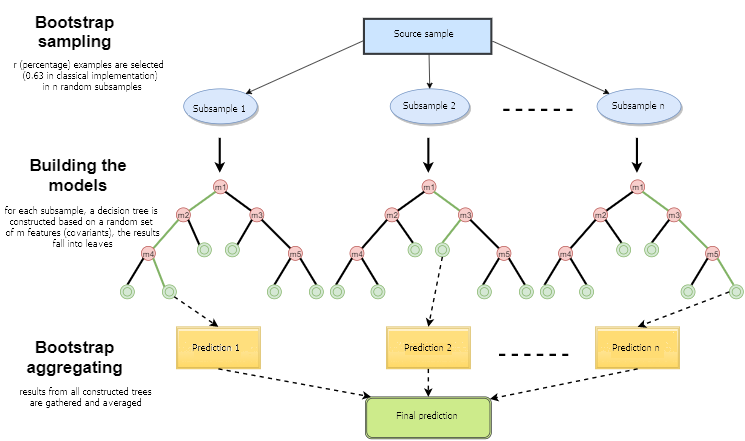

# What is "random" in Random Forest?

The "random" aspect in Random Forest comes from two main sources of randomness:
 1. Random sampling of data: Each tree in the forest is trained on a different random subset of the training data, selected with replacement (this is called bootstrap sampling).
 2. Random selection of features: When splitting nodes in each tree, a random subset of features is considered, rather than all features.

 These sources of randomness help ensure that the individual trees are diverse, which improves the overall performance and robustness of the Random Forest model.


## Step-by-step Implementation of Random Forest (for Classification)
 
1. **Prepare the Data**:  
    - Split your dataset into features (X) and target (y).
    - Optionally, split into training and test sets.
 
2. **Bootstrap Sampling**:  
    - For each tree, randomly sample (with replacement) from the training data to create a bootstrap sample.
 
3. **Build Decision Trees**:  
    - For each bootstrap sample, grow a decision tree:
        - At each node, select a random subset of features.
        - Find the best split among these features.
        - Repeat recursively until stopping criteria are met (e.g., max depth, min samples).
 
4. **Repeat**:  
    - Repeat steps 2 and 3 to build multiple trees (e.g., 100 trees).
 
5. **Aggregate Predictions**:  
    - For classification, each tree votes for a class.
    - The final prediction is the class with the most votes (majority voting).
 
6. **Evaluate the Model**:  
    - Use the test set to evaluate accuracy or other metrics.
 


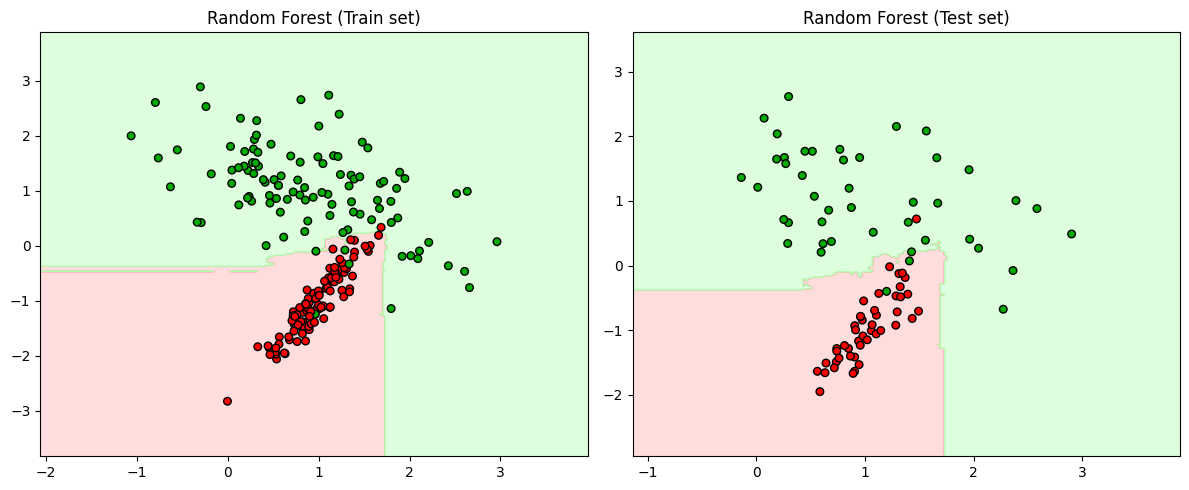

Train accuracy: 1.00
Test accuracy: 0.94


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# 1. Generate a synthetic classification dataset
X, y = make_classification(
    n_samples=300, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, random_state=42
)

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 4. Visualize decision boundaries for train and test sets
def plot_decision_boundary(X, y, clf, ax, title):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  # step size in the mesh

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00AA00'])

    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.4)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=30)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary(X_train, y_train, clf, axes[0], "Random Forest (Train set)")
plot_decision_boundary(X_test, y_test, clf, axes[1], "Random Forest (Test set)")
plt.tight_layout()
plt.show()

# Print accuracy scores
train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
print(f"Train accuracy: {train_acc:.2f}")
print(f"Test accuracy: {test_acc:.2f}")


## Key Parameters of RandomForestClassifier
 
 - **n_estimators**: Number of trees in the forest (default=100).
 - **criterion**: Function to measure the quality of a split ('gini' for Gini impurity, 'entropy' for information gain).
 - **max_depth**: Maximum depth of each tree (default=None, nodes are expanded until all leaves are pure).
 - **min_samples_split**: Minimum number of samples required to split an internal node (default=2).
 - **min_samples_leaf**: Minimum number of samples required to be at a leaf node (default=1).
 - **max_features**: Number of features to consider when looking for the best split (default='auto').
 - **bootstrap**: Whether bootstrap samples are used when building trees (default=True).
 - **random_state**: Controls randomness for reproducibility.
 - **n_jobs**: Number of jobs to run in parallel (default=None, uses 1 core).
 - **class_weight**: Weights associated with classes (default=None).
 
 For a full list, see the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).


# Pros and Cons of Random Forest

Pros:
 - Handles both classification and regression tasks effectively.
 - Reduces overfitting by averaging multiple decision trees.
 - Can handle large datasets with higher dimensionality.
 - Provides feature importance, helping with feature selection.
 - Robust to outliers and noise.
 - Works well with both categorical and numerical features.

Cons:
 - Can be computationally intensive and slower to predict compared to single decision trees.
 - Less interpretable than a single decision tree (harder to visualize the overall model).
 - May require more memory and resources due to the ensemble of trees.
 - Can still overfit if the trees are not properly pruned or if there are too many trees.
